In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import os
import glob
import numpy as np
import pandas as pd
import PIL
from random import sample
import csv
import pubchempy as pcp
import matplotlib.pyplot as plt
import bokeh
from itertools import chain
%matplotlib inline
from rdkit.Chem.SaltRemover import SaltRemover

from sklearn import preprocessing 
from sklearn.compose import make_column_transformer

In [2]:
os.chdir("/home/amna/PubChem")

In [3]:
tables_list=glob.glob("*txt")
print(tables_list)
CID_dict = {}
cidslist = []
for table in tables_list:
    tableID = table.replace('.txt','')
    tableID = tableID.replace('../data/','')
    CID_dict[tableID] = []
    with open(table) as inf:
        for aline in inf.readlines():
            if aline.startswith('CID')==True:
                #cid = aline.replace('\n')
                CID_dict[tableID].append(aline.replace('\n','').replace('CID: ',''))

['reproductivecontrol.txt', 'gastrointestinal.txt', 'hematologic.txt', 'antineoplastic.txt', 'dermatologic.txt', 'lipidregulating.txt', 'urological.txt', 'cns.txt', 'cardio.txt', 'antiinfective.txt', 'respiratorysystem.txt', 'antiinflammatory.txt']


In [4]:
print(len(CID_dict[tableID]))
CID_dict.keys()
print(CID_dict[tableID][0])

CID_dict

len(CID_dict['respiratorysystem'])

total_molecules = 0
for k in CID_dict:
  print(k," : ",len(CID_dict[k]))
  total_molecules+=len(CID_dict[k]) 
total_molecules


662
134715169
reproductivecontrol  :  265
gastrointestinal  :  631
hematologic  :  555
antineoplastic  :  1876
dermatologic  :  257
lipidregulating  :  233
urological  :  73
cns  :  2034
cardio  :  1673
antiinfective  :  3404
respiratorysystem  :  398
antiinflammatory  :  662


12061

In [5]:
# get SMILES for CIDs

### keep things with smiles length <400

smiles_dict = {}

for key in CID_dict.keys():
    smiles_dict[key] = []
    prop_dict = pcp.get_properties('IsomericSMILES', CID_dict[key])
    for i in range(0, len(prop_dict)):
        if len(prop_dict[i]['IsomericSMILES'])<400:  #### only those under 200 char
            smiles_dict[key].append(prop_dict[i]['IsomericSMILES'])

                
print(prop_dict[i]["IsomericSMILES"])
print(len(smiles_dict[key]))


C1=CC(=C(C=C1C2C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O
656


In [6]:
total=0
for key in CID_dict.keys():
    total+=len(smiles_dict[key])
    print(len(smiles_dict[key]))
print(total)

264
619
540
1867
257
228
73
2025
1636
3367
396
656
11928


In [7]:
## do any overlap?

### make master list of all smiles that overlap among the sets

rm = []
for key1 in smiles_dict.keys():
    print(key1+ '__________MAIN_len='+str(len(set(smiles_dict[key1]))))
    for key2 in smiles_dict.keys(): ### loop through the keys and check for overlap
        if key1 != key2: ### first key cannot equal second key
            rm.append(list(set(smiles_dict[key1]) & set(smiles_dict[key2])))
            print(str(key2)+'_'+str(len(list(set(smiles_dict[key1]) & set(smiles_dict[key2])))))

rm

new_rm = [item for sublist in rm for item in sublist]
new_rm

reproductivecontrol__________MAIN_len=264
gastrointestinal_2
hematologic_4
antineoplastic_30
dermatologic_6
lipidregulating_1
urological_0
cns_12
cardio_38
antiinfective_5
respiratorysystem_17
antiinflammatory_11
gastrointestinal__________MAIN_len=616
reproductivecontrol_2
hematologic_5
antineoplastic_27
dermatologic_9
lipidregulating_19
urological_0
cns_151
cardio_22
antiinfective_69
respiratorysystem_4
antiinflammatory_46
hematologic__________MAIN_len=535
reproductivecontrol_4
gastrointestinal_5
antineoplastic_19
dermatologic_0
lipidregulating_7
urological_1
cns_13
cardio_174
antiinfective_14
respiratorysystem_4
antiinflammatory_36
antineoplastic__________MAIN_len=1858
reproductivecontrol_30
gastrointestinal_27
hematologic_19
dermatologic_40
lipidregulating_1
urological_0
cns_43
cardio_47
antiinfective_362
respiratorysystem_0
antiinflammatory_48
dermatologic__________MAIN_len=252
reproductivecontrol_6
gastrointestinal_9
hematologic_0
antineoplastic_40
lipidregulating_0
urological_0
c

['CCCC[C@@](C)(C/C=C/[C@H]1[C@@H](CC(=O)[C@@H]1CCCCCCC(=O)OC)O)O',
 'CCCCC(C)(C/C=C/[C@H]1[C@@H](CC(=O)[C@@H]1CCCCCCC(=O)OC)O)O',
 'CC(=O)C1(CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2C=C(C4=CC(=O)CC[C@]34C)Cl)C)OC(=O)C.C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@]2(C#C)O)CCC4=CC(=O)CC[C@H]34',
 'CC1=CC(=O)C2=C(C1=O)C=CC=C2O',
 'CC(=O)[C@]1(CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2C=C(C4=CC(=O)CC[C@]34C)Cl)C)OC(=O)C.C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O)CCC4=CC(=O)CC[C@H]34',
 'C=CCSSSCC=C',
 'CC(C)CC(C(=O)NC(CCCN=C(N)N)C(=O)N1CCCC1C(=O)NCC(=O)N)NC(=O)C(CC2=CNC3=CC=CC=C32)NC(=O)C(CC4=CC=C(C=C4)O)NC(=O)C(CO)NC(=O)C(CC5=CNC6=CC=CC=C65)NC(=O)C(CC7=CN=CN7)NC(=O)C8CCC(=O)N8',
 'CC\\1=C(C2=C(/C1=C\\C3=CC=C(C=C3)SC)C=CC(=C2)F)CC(=O)O',
 'CC(C)C[C@@H](C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@@H]1C(=O)NCC(=O)N)NC(=O)[C@@H](CC2=CNC3=CC=CC=C32)NC(=O)[C@H](CC4=CC=C(C=C4)O)NC(=O)[C@H](CO)NC(=O)[C@H](CC5=CNC6=CC=CC=C65)NC(=O)[C@H](CC7=CN=CN7)NC(=O)[C@@H]8CCC(=O)N8.C1=CC=C2C(=C1)C=C(C(=C2CC3=C(C(=CC4=CC=CC=C43)C(=O)O)O)O)C(=O)O',
 'C

In [8]:
### Remove those and check there is no longer overlap

len(smiles_dict['antiinfective'])

nsmilesd = {}
for key in smiles_dict.keys():
    nsmilesd[key] = list(set(smiles_dict[key])-set(new_rm))
    print(key+ '__________NEW_len='+str(len(nsmilesd[key])))
    print(key+ '__________OLD_len='+str(len(set(smiles_dict[key]))))
    


reproductivecontrol__________NEW_len=165
reproductivecontrol__________OLD_len=264
gastrointestinal__________NEW_len=321
gastrointestinal__________OLD_len=616
hematologic__________NEW_len=315
hematologic__________OLD_len=535
antineoplastic__________NEW_len=1325
antineoplastic__________OLD_len=1858
dermatologic__________NEW_len=133
dermatologic__________OLD_len=252
lipidregulating__________NEW_len=176
lipidregulating__________OLD_len=225
urological__________NEW_len=49
urological__________OLD_len=73
cns__________NEW_len=1501
cns__________OLD_len=2023
cardio__________NEW_len=1039
cardio__________OLD_len=1635
antiinfective__________NEW_len=2790
antiinfective__________OLD_len=3364
respiratorysystem__________NEW_len=144
respiratorysystem__________OLD_len=396
antiinflammatory__________NEW_len=412
antiinflammatory__________OLD_len=652


In [9]:
### check they overlap is gone

for key1 in nsmilesd.keys():
    rm2 = []
    print(key1+ '__________MAIN_len='+str(len(nsmilesd[key1])))
    for key2 in nsmilesd.keys(): ### loop through the keys and check for overlap
        if key1 != key2: ### first key cannot equal second key
            rm2.append(list(set(nsmilesd[key1]) & set(nsmilesd[key2])))
            print(str(key2)+'_'+str(len(list(set(nsmilesd[key1]) & set(nsmilesd[key2])))))

reproductivecontrol__________MAIN_len=165
gastrointestinal_0
hematologic_0
antineoplastic_0
dermatologic_0
lipidregulating_0
urological_0
cns_0
cardio_0
antiinfective_0
respiratorysystem_0
antiinflammatory_0
gastrointestinal__________MAIN_len=321
reproductivecontrol_0
hematologic_0
antineoplastic_0
dermatologic_0
lipidregulating_0
urological_0
cns_0
cardio_0
antiinfective_0
respiratorysystem_0
antiinflammatory_0
hematologic__________MAIN_len=315
reproductivecontrol_0
gastrointestinal_0
antineoplastic_0
dermatologic_0
lipidregulating_0
urological_0
cns_0
cardio_0
antiinfective_0
respiratorysystem_0
antiinflammatory_0
antineoplastic__________MAIN_len=1325
reproductivecontrol_0
gastrointestinal_0
hematologic_0
dermatologic_0
lipidregulating_0
urological_0
cns_0
cardio_0
antiinfective_0
respiratorysystem_0
antiinflammatory_0
dermatologic__________MAIN_len=133
reproductivecontrol_0
gastrointestinal_0
hematologic_0
antineoplastic_0
lipidregulating_0
urological_0
cns_0
cardio_0
antiinfective_

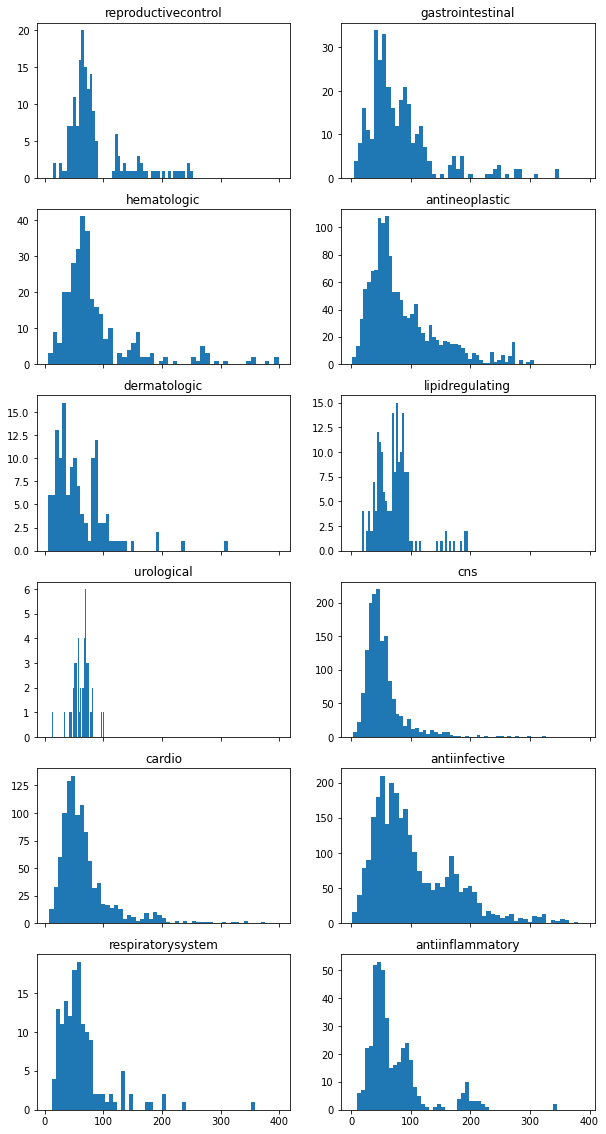

In [10]:
smiles_dict = nsmilesd
fig, axs = plt.subplots(ncols=2, figsize=(10, 20),nrows=6, sharex ='col')
k = 0
keys = list(smiles_dict.keys())

for i in range(6):
    for j in range(2):
        smileslens = [len(i) for i in smiles_dict[keys[k]]]
        axs[i, j].hist(smileslens,bins=50)
        axs[i,j].set_title(str(keys[k]).format(i+1))
        k +=1


In [11]:
# Remove salts

#os.chdir('/home/jgmeyer2/drugclass/data/SMILES/')

remover = SaltRemover()
cln_smiles_dict = {}

for key in smiles_dict.keys():
    tmplist = []
    for smiles in smiles_dict[key]:
        tmplist.append(Chem.MolToSmiles(remover(Chem.MolFromSmiles(smiles))))
    cln_smiles_dict[key] = list(set(tmplist))

RDKit WARNING: [14:34:35] WARNING: not removing hydrogen atom without neighbors
[14:34:35] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:35] WARNING: not removing hydrogen atom without neighbors
[14:34:35] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:35] WARNING: not removing hydrogen atom without neighbors
[14:34:35] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:36] WARNING: not removing hydrogen atom without neighbors
[14:34:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:36] WARNING: not removing hydrogen atom without neighbors
[14:34:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:37] WARNING: not removing hydrogen atom without neighbors
[14:34:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:38] WARNING: not removing hydrogen atom without neighbors
[14:34:38] WARNING: not removing hydrogen atom wit

RDKit WARNING: [14:34:46] WARNING: not removing hydrogen atom without neighbors
[14:34:46] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:46] WARNING: not removing hydrogen atom without neighbors
[14:34:46] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:46] WARNING: not removing hydrogen atom without neighbors
[14:34:46] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:46] WARNING: not removing hydrogen atom without neighbors
[14:34:46] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:46] WARNING: not removing hydrogen atom without neighbors
[14:34:46] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:47] WARNING: not removing hydrogen atom without neighbors
[14:34:47] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:48] WARNING: not removing hydrogen atom without neighbors
[14:34:48] WARNING: not removing hydrogen atom wit

In [12]:

df = pd.DataFrame()
for cls in cln_smiles_dict.keys():
  df_new = pd.DataFrame({'Smiles':cln_smiles_dict[cls]})
  df_new['Class']=cls
  df=df.append(df_new)
df['Class'].value_counts()


/tmp/ipykernel_35047/1482731447.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_new)
/tmp/ipykernel_35047/1482731447.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_new)
/tmp/ipykernel_35047/1482731447.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_new)
/tmp/ipykernel_35047/1482731447.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_new)
/tmp/ipykernel_35047/1482731447.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_new)
/tmp/ipykernel_35047/148273144

antiinfective          2415
antineoplastic         1177
cns                    1153
cardio                  797
antiinflammatory        374
hematologic             268
gastrointestinal        263
lipidregulating         164
reproductivecontrol     148
dermatologic            116
respiratorysystem       101
urological               29
Name: Class, dtype: int64

In [13]:
ohe = preprocessing.OneHotEncoder()
transformed = ohe.fit_transform(df[['Class']])

print(transformed.toarray())

df[ohe.categories_[0]] = transformed.toarray()

df

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


,Smiles,Class,antiinfective,antiinflammatory,antineoplastic,cardio,cns,dermatologic,gastrointestinal,hematologic,lipidregulating,reproductivecontrol,respiratorysystem,urological
0,C#C[C@@]1(O)CC[C@@H]2[C@H]3CCC4=CC(=O)CC[C@H]4...,reproductivecontrol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,O=C([O-])CCCC=CCC1C(O)CC(O)C1C=CC(O)COc1cccc(C...,reproductivecontrol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,CCN(CC)CCOc1ccc(/C(=C(/Cl)c2ccccc2)c2ccccc2)cc1,reproductivecontrol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,CC#C[C@]1(O)CC[C@H]2[C@@H]3C[C@H](C)C4=CC(=O)C...,reproductivecontrol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,C#C[C@]1(O)C=C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]...,reproductivecontrol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,C=C1C(=O)OC2C1CC/C(C)=C/CCC1(C)OC21,antiinflammatory,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
370,CCOCCO[C@@H]1CC[C@@H](C[C@@H](C)[C@@H]2CC(=O)[...,antiinflammatory,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
371,CC1(C)C2CC[C@]3(C)[C@H](C(=O)C=C4[C@@H]5C[C@@]...,antiinflammatory,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372,CC(C)=CCC1C(=O)N(c2ccccc2)N(c2ccccc2)C1=O,antiinflammatory,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X = df['Smiles'].values.tolist()

In [15]:
y = df['antiinfective'].values.tolist()

In [16]:
X

['C#C[C@@]1(O)CC[C@@H]2[C@H]3CCC4=CC(=O)CC[C@H]4[C@@H]3CC[C@]21CC',
 'O=C([O-])CCCC=CCC1C(O)CC(O)C1C=CC(O)COc1cccc(Cl)c1',
 'CCN(CC)CCOc1ccc(/C(=C(/Cl)c2ccccc2)c2ccccc2)cc1',
 'CC#C[C@]1(O)CC[C@H]2[C@@H]3C[C@H](C)C4=CC(=O)CC[C@]4(C)[C@H]3CC[C@@]21C',
 'C#C[C@]1(O)C=C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4[C@H]3CC[C@@]21CC.C#C[C@]1(O)CC[C@H]2[C@@H]3CCc4cc(O)ccc4[C@H]3CC[C@@]21C',
 'C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4[C@H]3CC[C@@]21C',
 'CC(C)(C)CC(C)(C)c1ccc(OCCOCCO)cc1',
 'Cc1cc2c(C(C)C)c(O)c(O)c(C=O)c2c(O)c1-c1c(C)cc2c(C(C)C)c(O)c(O)c(C=O)c2c1O',
 'CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1ccc(Cl)cc1)C(=O)N[C@H](Cc1cccnc1)C(=O)N[C@@H](CO)C(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@H](CCCNC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@H]1C(=O)N[C@H](C)C(N)=O',
 'CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)CCSSC[C@@H](C(=O)N2CCC[C@H]2C(=O)N[C@@H](CC(C)C)C(=O)NCC(N)=O)NC(=O)[C@H](CC(N)=O)NC(=O)[C@H](CCC(N)=O)NC1=O',
 'O=C([O-])CCCC=CC[C@H]1[C@@H](O)C[C@@H](O)[C@@H]1/C=

In [17]:
y

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

## Morgan Binary Classifier

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20)


In [19]:
import lazyqsar as lq

In [20]:
# train
model = lq.MorganBinaryClassifier()
model.fit(X_train, y_train)

RDKit WARNING: [14:34:52] WARNING: not removing hydrogen atom without neighbors
[14:34:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:52] WARNING: not removing hydrogen atom without neighbors
[14:34:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:52] WARNING: not removing hydrogen atom without neighbors
[14:34:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:52] WARNING: not removing hydrogen atom without neighbors
[14:34:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:52] WARNING: not removing hydrogen atom without neighbors
[14:34:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:52] WARNING: not removing hydrogen atom without neighbors
[14:34:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:52] WARNING: not removing hydrogen atom without neighbors
[14:34:52] WARNING: not removing hydrogen atom wit

[flaml.automl: 10-12 14:34:59] {3354} INFO -  at 3.3s,	estimator rf's best error=0.1430,	best estimator rf's best error=0.1430
[flaml.automl: 10-12 14:34:59] {3174} INFO - iteration 8, current learner rf
[flaml.automl: 10-12 14:34:59] {3354} INFO -  at 3.5s,	estimator rf's best error=0.1430,	best estimator rf's best error=0.1430
[flaml.automl: 10-12 14:34:59] {3174} INFO - iteration 9, current learner rf
[flaml.automl: 10-12 14:35:00] {3354} INFO -  at 4.2s,	estimator rf's best error=0.1430,	best estimator rf's best error=0.1430
[flaml.automl: 10-12 14:35:00] {3174} INFO - iteration 10, current learner rf
[flaml.automl: 10-12 14:35:01] {3354} INFO -  at 4.9s,	estimator rf's best error=0.0810,	best estimator rf's best error=0.0810
[flaml.automl: 10-12 14:35:01] {3174} INFO - iteration 11, current learner rf
[flaml.automl: 10-12 14:35:01] {3354} INFO -  at 5.4s,	estimator rf's best error=0.0810,	best estimator rf's best error=0.0810
[flaml.automl: 10-12 14:35:01] {3174} INFO - iteration 

In [21]:

# validate
from sklearn.metrics import roc_curve, auc
y_hat = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_hat)
print("AUROC", auc(fpr, tpr))

RDKit WARNING: [14:35:22] WARNING: not removing hydrogen atom without neighbors
[14:35:22] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:35:22] WARNING: not removing hydrogen atom without neighbors
[14:35:22] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:35:22] WARNING: not removing hydrogen atom without neighbors
[14:35:22] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:35:22] WARNING: not removing hydrogen atom without neighbors
[14:35:22] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:35:22] WARNING: not removing hydrogen atom without neighbors
[14:35:22] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:35:22] WARNING: not removing hydrogen atom without neighbors
[14:35:22] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:35:22] WARNING: not removing hydrogen atom without neighbors
[14:35:22] WARNING: not removing hydrogen atom wit

AUROC 0.9653276769645056


## Mordred Binary Classifier

In [22]:
model2 = lq.MordredBinaryClassifier()

In [ ]:
model2.fit(X_train, y_train)

RDKit WARNING: [14:35:23] WARNING: not removing hydrogen atom without neighbors
[14:35:23] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:35:23] WARNING: not removing hydrogen atom without neighbors
[14:35:23] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:35:23] WARNING: not removing hydrogen atom without neighbors
[14:35:23] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:35:23] WARNING: not removing hydrogen atom without neighbors
[14:35:23] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:35:23] WARNING: not removing hydrogen atom without neighbors
[14:35:23] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:35:23] WARNING: not removing hydrogen atom without neighbors
[14:35:23] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:35:23] WARNING: not removing hydrogen atom without neighbors
[14:35:23] WARNING: not removing hydrogen atom wit

overflow encountered in reduce


  0%|▏                                        | 20/5604 [00:06<30:19,  3.07it/s]

overflow encountered in reduce


  7%|██▊                                     | 387/5604 [02:23<24:21,  3.57it/s]RDKit WARNING: [14:37:48] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:37:48] WARNING: not removing hydrogen atom without neighbors
[14:37:48] WARNING: not removing hydrogen atom without neighbors
[14:37:48] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:37:48] WARNING: not removing hydrogen atom without neighbors
[14:37:48] WARNING: not removing hydrogen atom without neighbors
  8%|███▎                                    | 466/5604 [02:46<21:44,  3.94it/s]RDKit WARNING: [14:38:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:38:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:38:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:38:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:38:11] WARNING: not removing hydrogen atom without neighbors
RDKit

 24%|█████████▏                             | 1326/5604 [07:07<21:36,  3.30it/s]RDKit WARNING: [14:42:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:42:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:42:32] WARNING: not removing hydrogen atom without neighbors
[14:42:32] WARNING: not removing hydrogen atom without neighbors
[14:42:32] WARNING: not removing hydrogen atom without neighbors
[14:42:32] WARNING: not removing hydrogen atom without neighbors
 25%|█████████▊                             | 1401/5604 [07:31<17:23,  4.03it/s]RDKit WARNING: [14:42:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:42:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:42:56] WARNING: not removing hydrogen atom without neighbors
[14:42:56] WARNING: not removing hydrogen atom without neighbors
[14:42:56] WARNING: not removing hydrogen atom without neighbors
[14:42:56] WARNING: not removing hy

Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars


 50%|███████████████████▌                   | 2815/5604 [16:01<12:45,  3.65it/s]RDKit WARNING: [14:51:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:51:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:51:26] WARNING: not removing hydrogen atom without neighbors
[14:51:26] WARNING: not removing hydrogen atom without neighbors
[14:51:26] WARNING: not removing hydrogen atom without neighbors
[14:51:26] WARNING: not removing hydrogen atom without neighbors
 53%|████████████████████▌                  | 2955/5604 [16:53<14:51,  2.97it/s]RDKit WARNING: [14:52:18] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:52:18] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:52:18] WARNING: not removing hydrogen atom without neighbors
[14:52:18] WARNING: not removing hydrogen atom without neighbors
[14:52:18] WARNING: not removing hydrogen atom without neighbors
[14:52:18] WARNING: not removing hy

In [ ]:
# validate
from sklearn.metrics import roc_curve, auc
y_hat = model2.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_hat)
print("AUROC", auc(fpr, tpr))